# Preparation

In [1]:
# Import primary functions
import PIL
import keras
import os
import skimage
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

# Import secondary functions
from PIL import Image
from skimage import io
from keras import backend as K
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Activation, BatchNormalization, Conv2D, Dropout, GlobalAveragePooling2D, Input, MaxPool2D
from keras.models import Model, Sequential, load_model
from keras.optimizers import Adam, SGD
from keras.utils import plot_model
from keras.applications.mobilenet import MobileNet
from sklearn.metrics import classification_report

# Import tertiary functions
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, GlobalAveragePooling2D, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

2024-07-25 10:04:28.286305: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-25 10:04:28.286442: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-25 10:04:28.414541: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Assign dataset sources

In [2]:
train_data = "/kaggle/input/tomato/train"
test_data = "/kaggle/input/tomato/valid"

## Set up batch and image size

In [3]:
batch_size = 32
img_size = 224

# Data generation

In [4]:
# Generate actual value of the dataset
train_datagen = ImageDataGenerator(
    rescale=1/255.,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2
)

test_datagen = ImageDataGenerator(rescale=1/255.)

train_generator = train_datagen.flow_from_directory(
    train_data,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    shuffle=True,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_data,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    shuffle=False,
    class_mode='categorical'
)

Found 25851 images belonging to 11 classes.
Found 6683 images belonging to 11 classes.


# Describe image labels

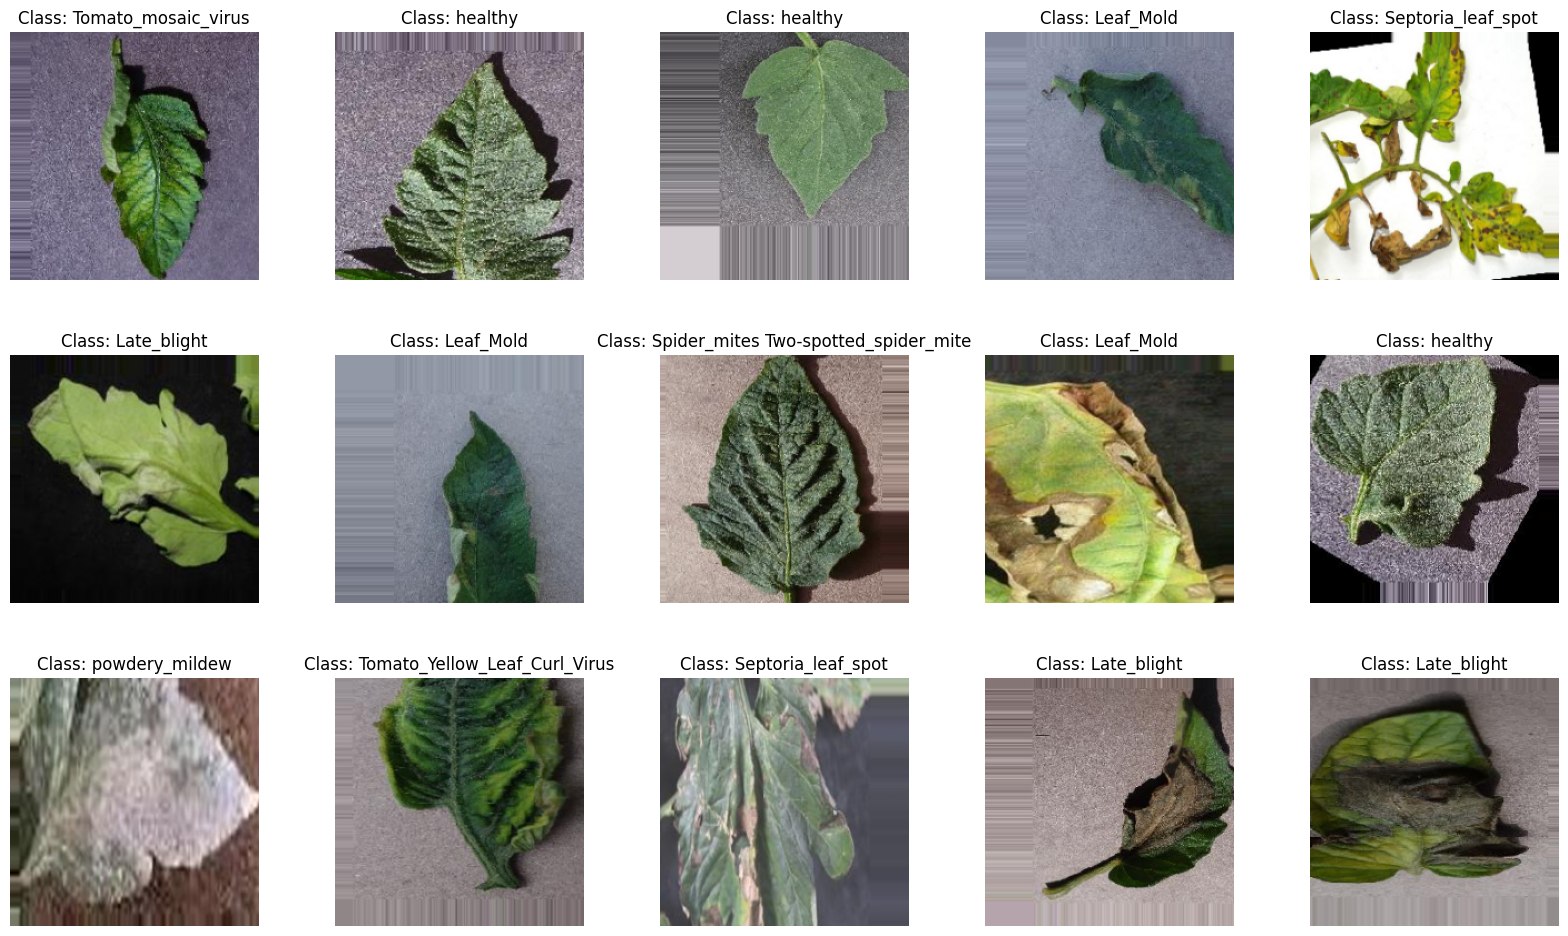

In [7]:
# Generate image plot
labels = [k for k in train_generator.class_indices]
sample_generate = train_generator.__next__()

images = sample_generate[0]
titles = sample_generate[1]
plt.figure(figsize=(20, 20))

for i in range(15):
    plt.subplot(5, 5, i+1)
    plt.subplots_adjust(hspace=0.3, wspace=0.3)
    plt.imshow(images[i])
    plt.title(f'Class: {labels[np.argmax(titles[i], axis=0)]}')
    plt.axis("off")

In [8]:
train_generator[0][0].shape

(32, 224, 224, 3)

In [9]:
img = train_generator[0]
print(img)

(array([[[[0.4703564 , 0.42329758, 0.43898386],
         [0.4704342 , 0.42337534, 0.43906164],
         [0.4768179 , 0.4297591 , 0.44544536],
         ...,
         [0.49829847, 0.45123965, 0.45908278],
         [0.49829847, 0.45123965, 0.45908278],
         [0.49829847, 0.45123965, 0.45908278]],

        [[0.48113373, 0.4340749 , 0.44976118],
         [0.4644782 , 0.41741937, 0.43310565],
         [0.46332633, 0.4162675 , 0.4319538 ],
         ...,
         [0.45661306, 0.40955424, 0.41739738],
         [0.45661306, 0.40955424, 0.41739738],
         [0.45661306, 0.40955424, 0.41739738]],

        [[0.49171463, 0.4446558 , 0.46034208],
         [0.4618979 , 0.4148391 , 0.43052536],
         [0.4784878 , 0.43142897, 0.44711524],
         ...,
         [0.5297035 , 0.48264465, 0.49048778],
         [0.5297035 , 0.48264465, 0.49048778],
         [0.5297035 , 0.48264465, 0.49048778]],

        ...,

        [[0.55070645, 0.52325547, 0.55070645],
         [0.5671468 , 0.5396958 , 0.5671468 

In [10]:
img = train_generator[0]
print(img[0].shape)
print(img[1].shape)

(32, 224, 224, 3)
(32, 11)


In [11]:
print(len(train_generator))
print(len(train_data))

808
26


# Single image analyzation

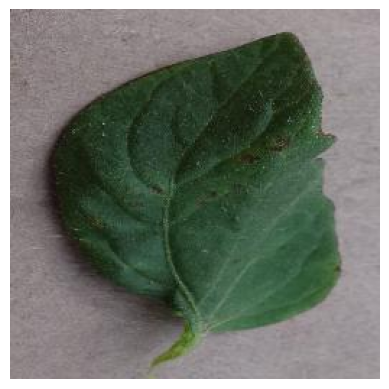

In [12]:
# Load the image
img_url = "/kaggle/input/tomato/valid/Bacterial_spot/014b58ae-091b-408a-ab4a-5a780cd1c3f3___GCREC_Bact.Sp 2971.JPG"
img = io.imread(img_url)

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()

/tmp/ipykernel_34/3007244983.py:4: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNet(include_top=False, input_tensor=input_tensor)


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,240,139 (12.36 MB)

 Trainable params: 3,218,251 (12.28 MB)

 Non-trainable params: 21,888 (85.50 KB)

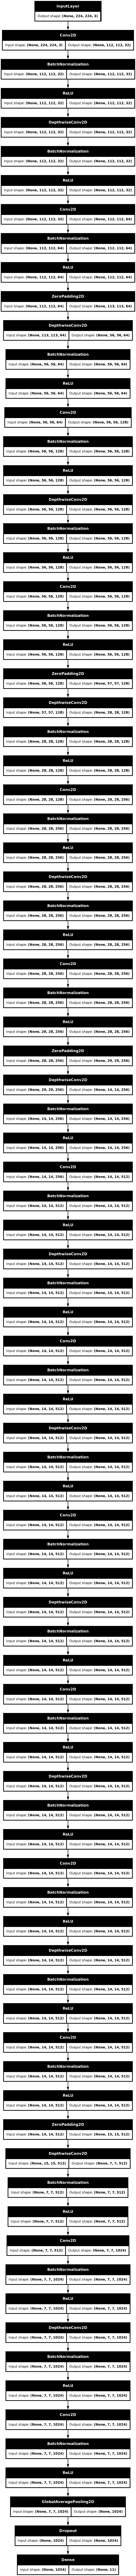

In [13]:
def mobilenet(input_shape):
    # Model initialization
    input_tensor = Input(shape=input_shape)
    base_model = MobileNet(include_top=False, input_tensor=input_tensor)
    # Define functional arguments
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    x = Dense(11, activation='softmax')(x)
    # Attach into model
    model = Model(inputs=input_tensor, outputs=x)
    
    return model

# Generate the model's performance statistics
input_shape = (224, 224, 3)
num_classes = 11

model = mobilenet(input_shape)
model.summary()
plot_model(model, to_file='mobilenet.png', show_shapes=True)

# Model fitting and training

In [14]:
model = mobilenet((224, 224, 3))

/tmp/ipykernel_34/3007244983.py:4: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNet(include_top=False, input_tensor=input_tensor)


In [15]:
opt = Adam(learning_rate=0.01)

model.compile(
    optimizer=opt,
    loss=keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)

In [16]:
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=15
)

Epoch 1/15


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  2/808 ━━━━━━━━━━━━━━━━━━━━ 1:04 80ms/step - accuracy: 0.0391 - loss: 4.3266  

I0000 00:00:1721902158.943108     123 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


808/808 ━━━━━━━━━━━━━━━━━━━━ 578s 671ms/step - accuracy: 0.4503 - loss: 1.7796 - val_accuracy: 0.4336 - val_loss: 3.6874
Epoch 2/15
808/808 ━━━━━━━━━━━━━━━━━━━━ 328s 403ms/step - accuracy: 0.7222 - loss: 0.8450 - val_accuracy: 0.4253 - val_loss: 6.1948
Epoch 3/15
808/808 ━━━━━━━━━━━━━━━━━━━━ 324s 398ms/step - accuracy: 0.7747 - loss: 0.6734 - val_accuracy: 0.4173 - val_loss: 3.4676
Epoch 4/15
808/808 ━━━━━━━━━━━━━━━━━━━━ 335s 411ms/step - accuracy: 0.8035 - loss: 0.6013 - val_accuracy: 0.8257 - val_loss: 0.6319
Epoch 5/15
808/808 ━━━━━━━━━━━━━━━━━━━━ 322s 395ms/step - accuracy: 0.8352 - loss: 0.4960 - val_accuracy: 0.7148 - val_loss: 1.2253
Epoch 6/15
808/808 ━━━━━━━━━━━━━━━━━━━━ 326s 400ms/step - accuracy: 0.8433 - loss: 0.4754 - val_accuracy: 0.7919 - val_loss: 0.8074
Epoch 7/15
808/808 ━━━━━━━━━━━━━━━━━━━━ 324s 398ms/step - accuracy: 0.8521 - loss: 0.4380 - val_accuracy: 0.7115 - val_loss: 1.2267
Epoch 8/15
808/808 ━━━━━━━━━━━━━━━━━━━━ 328s 403ms/step - accuracy: 0.8642 - loss: 0.40

In [17]:
n_categories = len(os.listdir('/kaggle/input/tomato/train'))
n_categories

11

In [18]:
results = pd.DataFrame(history.history)
results.head()

accuracy      loss  val_accuracy  val_loss
0  0.576960  1.307994      0.433638  3.687425
1  0.740165  0.786312      0.425258  6.194789
2  0.785502  0.642290      0.417328  3.467613
3  0.810336  0.576933      0.825677  0.631883
4  0.835983  0.498699      0.714799  1.225256

# Line plots

## Model loss

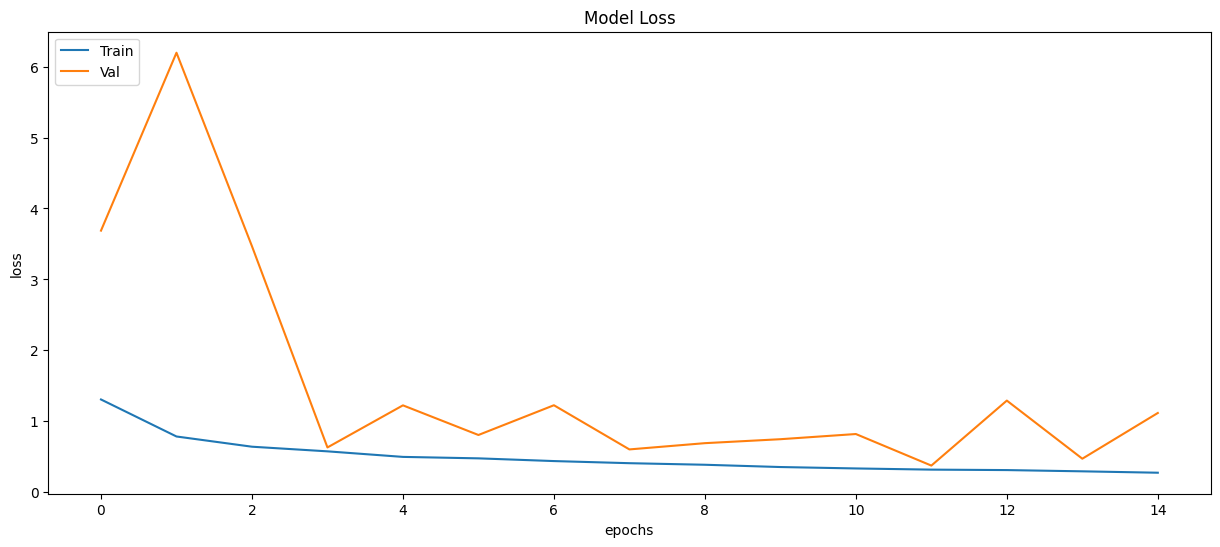

In [19]:
plt.figure(figsize=(15, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

## Model accuracy

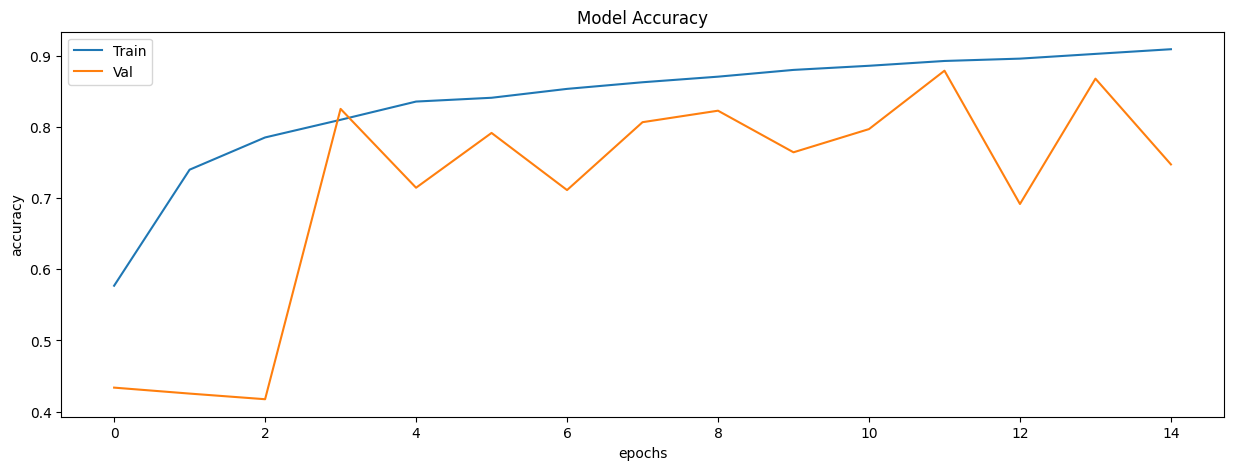

In [20]:
plt.figure(figsize=(15, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Prediction and evaluation

In [21]:
y_test_1 = test_generator.classes
y_pred_1 = model.predict(test_generator)
y_pred_1 = np.argmax(y_pred_1, axis=1)

209/209 ━━━━━━━━━━━━━━━━━━━━ 22s 97ms/step


In [22]:
results = model.evaluate(test_generator)

209/209 ━━━━━━━━━━━━━━━━━━━━ 19s 90ms/step - accuracy: 0.8087 - loss: 0.7678


In [23]:
print(classification_report(y_test_1, y_pred_1))

              precision    recall  f1-score   support

           0       0.77      0.80      0.78       732
           1       0.70      0.92      0.80       643
           2       0.66      0.93      0.77       792
           3       0.84      0.68      0.75       739
           4       0.85      0.59      0.70       746
           5       0.46      1.00      0.63       435
           6       0.99      0.17      0.29       457
           7       0.81      0.96      0.88       498
           8       0.97      0.46      0.62       584
           9       0.91      0.98      0.94       805
          10       0.97      0.39      0.56       252

    accuracy                           0.75      6683
   macro avg       0.81      0.72      0.70      6683
weighted avg       0.81      0.75      0.73      6683



In [27]:
image_directory = '/kaggle/input/tomato/valid/Tomato_Yellow_Leaf_Curl_Virus'
img_size = 224

images = []

for filename in os.listdir(image_directory):
    path = os.path.join(image_directory, filename)
    img = Image.open(path)
    img = img.resize((img_size, img_size))
    images.append(img)

images = np.array([np.array(img) for img in images])
images = images / 255.0

predictions = model.predict(images)

img_index = 0
class_label = np.argmax(predictions[img_index])

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [ ]:
plt.imshow(images[img_index])
plt.axis('off')
plt.title('Predicted class: ' + str(class_label))
plt.show()

In [31]:
for i in range(len(images)):
    predicted_class = np.argmax(predictions[i])
    class_probability = predictions[i, predicted_class]
    print(f'Predicted class for {i+1}.jpg: {labels[predicted_class]}')
    print('Class probability: ', class_probability)

Predicted class for 1.jpg: Tomato_Yellow_Leaf_Curl_Virus
Class probability:  0.9999999
Predicted class for 2.jpg: Tomato_Yellow_Leaf_Curl_Virus
Class probability:  0.8913614
Predicted class for 3.jpg: Tomato_Yellow_Leaf_Curl_Virus
Class probability:  0.84792584
Predicted class for 4.jpg: Tomato_Yellow_Leaf_Curl_Virus
Class probability:  1.0
Predicted class for 5.jpg: Tomato_Yellow_Leaf_Curl_Virus
Class probability:  1.0
Predicted class for 6.jpg: Tomato_Yellow_Leaf_Curl_Virus
Class probability:  1.0
Predicted class for 7.jpg: Tomato_Yellow_Leaf_Curl_Virus
Class probability:  0.99999905
Predicted class for 8.jpg: Tomato_Yellow_Leaf_Curl_Virus
Class probability:  1.0
Predicted class for 9.jpg: Tomato_Yellow_Leaf_Curl_Virus
Class probability:  0.99932027
Predicted class for 10.jpg: Tomato_Yellow_Leaf_Curl_Virus
Class probability:  1.0
Predicted class for 11.jpg: Tomato_Yellow_Leaf_Curl_Virus
Class probability:  1.0
Predicted class for 12.jpg: Tomato_Yellow_Leaf_Curl_Virus
Class probabilit